# ReadMe

Unless explicitly specified, the basic units in this notebook are constructed from um, fs and keV without other constant.

In [1]:
import sys
sys.path.append("../../../XRaySimulation")

import numpy as np
import matplotlib.pyplot as plt

from XRaySimulation import util, misc, Crystal

 ![](Example1.png)

# Specify the crystal 

In [15]:
# Some meta data for the delay line.
h_length = 2. * np.pi / (1.9201 * 1e-4)

# Some crystal properties
chi_dict = {"chi0":complex(-0.10826E-04, 0.18209E-06 ),
            "chih_sigma":complex(0.65800E-05, -0.17530E-06),
            "chihbar_sigma":complex(0.65800E-05, -0.17530E-06),
            "chih_pi":complex(0.50600E-05, -0.13313E-06),
            "chihbar_pi":complex(0.50600E-05, -0.13313E-06)
           }

# Asymmetric angle
alphas = -np.deg2rad(0.)

# Initialize the crystals
my_crystal1 = Crystal.CrystalBlock3D(h=np.array([0, h_length, 0]),
                                         normal=-np.array([0., np.cos(alphas),np.sin(alphas)]),
                                         surface_point=np.zeros(3),
                                         thickness=5.,
                                         chi_dict=chi_dict)

my_crystal2 = Crystal.CrystalBlock3D(h=np.array([0, h_length, 0]),
                                         normal=-np.array([0., np.cos(alphas),np.sin(alphas)]),
                                         surface_point=np.zeros(3),
                                         thickness=30,
                                         chi_dict=chi_dict)

my_crystal3 = Crystal.CrystalBlock3D(h=np.array([0, h_length, 0]),
                                         normal=-np.array([0., np.cos(alphas),np.sin(alphas)]),
                                         surface_point=np.zeros(3),
                                         thickness=1e6,
                                         chi_dict=chi_dict)

# Specify incident wave vectors

In [16]:
central_energy = 9.5 #kev
number_wavevec = 1000  # The number of wave vector to calculate 
energy_range = 2e-3 #keV.  The energy to calculate the reflectivity

In [17]:
# Convert the energy to the wave vector
central_wavevec = np.array([0,0, util.kev_to_wavevec_length(central_energy)])

# Get the wave vector array and other axes info
k_in_grid, axis_info = util.get_k_mesh_1d(number = number_wavevec, energy_range = energy_range)

# Add the reference wave vector to the wave vector
k_in_grid += central_wavevec[np.newaxis, :]

# Define the bragg angle to rotate the wave vector array
bragg = util.get_bragg_angle(wave_length = np.pi * 2 / util.kev_to_wavevec_length(energy=central_energy),
                             plane_distance = np.pi * 2 / h_length)
print("The bragg angle is {:.2f} degree".format(np.rad2deg(bragg)))

# Ajust the Bragg angle a bit
"""
This is just used to shift the rocking curve to the center.
This is not necessary.
"""
bragg += 11e-6

# Get the rotation matrix for the rotation
rot_mat = util.rot_mat_in_yz_plane(theta= bragg)

# Rotate the wave vectors
k_in_grid = np.dot(k_in_grid, rot_mat.T)

The bragg angle is 19.87 degree


# Get the reflectivity

In [18]:
#########################################################################
(reflect_sigma1, 
 reflect_pi1,
 b1,
 kout_grid1) = util.get_bragg_reflection_array(kin_grid = k_in_grid,
                                         d = my_crystal1.thickness,
                                         h = my_crystal1.h,
                                         n = my_crystal1.normal,
                                         chi0 = my_crystal1.chi0,
                                         chih_sigma = my_crystal1.chih_sigma,
                                         chihbar_sigma = my_crystal1.chihbar_sigma,
                                         chih_pi = my_crystal1.chih_pi,
                                         chihbar_pi = my_crystal1.chihbar_pi)
print("Finish calculating the reflectivity")

#########################################################################
(reflect_sigma2, 
 reflect_pi2,
 b2,
 kout_grid2) = util.get_bragg_reflection_array(kin_grid = k_in_grid,
                                         d = my_crystal2.thickness,
                                         h = my_crystal2.h,
                                         n = my_crystal2.normal,
                                         chi0 = my_crystal2.chi0,
                                         chih_sigma = my_crystal2.chih_sigma,
                                         chihbar_sigma = my_crystal2.chihbar_sigma,
                                         chih_pi = my_crystal2.chih_pi,
                                         chihbar_pi = my_crystal2.chihbar_pi)
print("Finish calculating the reflectivity")
#########################################################################

(reflect_sigma3, 
 reflect_pi3,
 b3,
 kout_grid3) = util.get_bragg_reflection_array(kin_grid = k_in_grid,
                                         d = my_crystal3.thickness,
                                         h = my_crystal3.h,
                                         n = my_crystal3.normal,
                                         chi0 = my_crystal3.chi0,
                                         chih_sigma = my_crystal3.chih_sigma,
                                         chihbar_sigma = my_crystal3.chihbar_sigma,
                                         chih_pi = my_crystal3.chih_pi,
                                         chihbar_pi = my_crystal3.chihbar_pi)
print("Finish calculating the reflectivity")

#########################################################################
sigma_reflectivity1 = np.abs(np.square(reflect_sigma1)) / np.abs(b1)
pi_reflectivity1 = np.abs(np.square(reflect_pi1)) / np.abs(b1)

sigma_reflectivity2 = np.abs(np.square(reflect_sigma2)) / np.abs(b2)
pi_reflectivity2 = np.abs(np.square(reflect_pi2)) / np.abs(b2)

sigma_reflectivity3 = np.abs(np.square(reflect_sigma3)) / np.abs(b3)
pi_reflectivity3 = np.abs(np.square(reflect_pi3)) / np.abs(b3)

Finish calculating the reflectivity
Finish calculating the reflectivity
Finish calculating the reflectivity


# Show curves

In [29]:
 plt.rcParams["font.family"] = "Times New Roman"

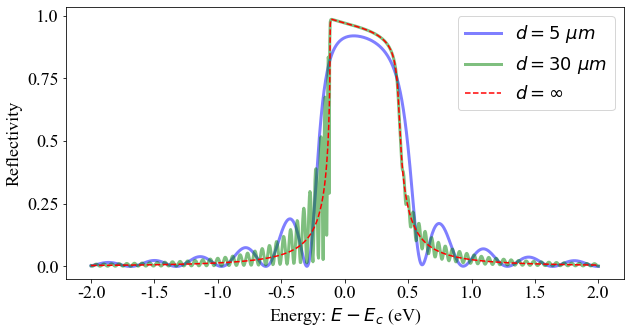

In [66]:
fontsize=18

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(5)
fig.set_figwidth(10)

axes.plot(axis_info['energy_grid'] * 1000, sigma_reflectivity1,c='b', linewidth=3, alpha=0.5,label="$d=5~\mu m$")
axes.plot(axis_info['energy_grid'] * 1000, sigma_reflectivity2,c='g', linewidth=3, alpha=0.5, label="$d=30~\mu m$")
axes.plot(axis_info['energy_grid'] * 1000, sigma_reflectivity3,c='r', linestyle='--', label="$d=\infty$")


axes.legend(loc = "upper right", fontsize=fontsize)
axes.set_xlabel("Energy: $E-E_c$ (eV)", fontsize=fontsize)
axes.set_ylabel("Reflectivity", fontsize=fontsize)
axes.set_xticklabels(labels=np.linspace(-2.5, 2, 10, endpoint=True,), fontsize=fontsize)
axes.set_yticks(np.linspace(0, 1, 5, endpoint=True,))
axes.set_yticklabels(labels=np.linspace(0, 1, 5, endpoint=True,), fontsize=fontsize)

plt.savefig("C:/Users/haoyuan/Desktop/reflectivity_vs_thickness.png",
            dpi=600,
            bbox_inches='tight', 
            pad_inches=0.0,)
plt.show()

# Get Bandwidth

In [79]:
fwhm_sigma = misc.get_fwhm(coordinate=axis_info["energy_grid"],
                           curve_values=sigma_reflectivity)

print("The fwhm of the reflectivity curver of the sigma polarization is")
print("{:.2e} eV".format(fwhm_sigma * 1000))

fwhm_pi = misc.get_fwhm(coordinate=axis_info["energy_grid"],
                           curve_values=pi_reflectivity)

print("The fwhm of the reflectivity curver of the pi polarization is")
print("{:.2e} eV".format(fwhm_pi * 1000))

The fwhm of the reflectivity curver of the sigma polarization is
1.28e+00 eV
The fwhm of the reflectivity curver of the pi polarization is
1.20e+00 eV
